# Porter Dataset Analysis

Porter, India's largest marketplace for intra-city logistics,works with a wide range of restaurants to deliver their items directly to customers.
The company wants to estimate the delivery time for each order based on various features, such as the items ordered, the restaurant, and the 
availability of delivery partners. An accurate estimation of delivery time will enhance customer satisfaction and optimize the delivery process.


## Data Preprocessing

##### Import all the required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as py
import seaborn as sns
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
import matplotlib.ticker as mtick
from scipy.stats import shapiro, chi2_contingency, ttest_1samp, ttest_ind, f_oneway, pearsonr, spearmanr


In [2]:
df=pd.read_csv(r'C:\Users\Admin\Downloads\dataset.csv')

#### Find Duplicates

In [3]:
df.duplicated().sum()

0

##### Checking For missing Values Values

In [4]:
df.isnull().sum()

market_id                     987
created_at                      0
actual_delivery_time            7
store_id                        0
store_primary_category       4760
order_protocol                995
total_items                     0
subtotal                        0
num_distinct_items              0
min_item_price                  0
max_item_price                  0
total_onshift_partners      16262
total_busy_partners         16262
total_outstanding_orders    16262
dtype: int64

##### Checking for all unique value incase there are some garbage value

In [5]:
df['market_id'].unique()

array([ 1.,  2.,  3.,  4., nan,  5.,  6.])

In [6]:
df['order_protocol'].unique()

array([ 1.,  2.,  3.,  4., nan,  5.,  6.,  7.])

In [7]:
df['store_primary_category'].unique()

array(['american', 'mexican', nan, 'indian', 'italian', 'sandwich',
       'thai', 'cafe', 'salad', 'pizza', 'chinese', 'singaporean',
       'burger', 'breakfast', 'mediterranean', 'japanese', 'greek',
       'catering', 'filipino', 'convenience-store', 'other', 'korean',
       'vegan', 'asian', 'barbecue', 'fast', 'dessert', 'smoothie',
       'seafood', 'vietnamese', 'cajun', 'steak', 'middle-eastern',
       'soup', 'vegetarian', 'persian', 'nepalese', 'sushi',
       'latin-american', 'hawaiian', 'chocolate', 'burmese', 'british',
       'pasta', 'alcohol', 'dim-sum', 'peruvian', 'turkish', 'malaysian',
       'ethiopian', 'afghan', 'bubble-tea', 'german', 'french',
       'caribbean', 'gluten-free', 'comfort-food', 'gastropub',
       'pakistani', 'moroccan', 'spanish', 'southern', 'tapas', 'russian',
       'brazilian', 'european', 'cheese', 'african', 'argentine',
       'kosher', 'irish', 'lebanese', 'belgian', 'indonesian',
       'alcohol-plus-food'], dtype=object)

##### Handling Missing Values

As market_id,order_protocol have only 6 to 7 different values we can take it as categorical coulmn and 
can replace missing values with 0 Which mean these market id's and order protocol are unknown and in store_primary_category We can replace it with Unknown.Rest others column we can replace with mean or median.

In [8]:
df['market_id'] = df['market_id'].fillna(0)
df['store_primary_category'] = df['store_primary_category'].fillna('Unknown')
df['order_protocol'] = df['order_protocol'].fillna(0)
df['total_onshift_partners'] = df['total_onshift_partners'].fillna(df['total_onshift_partners'].median())
df['total_busy_partners'] = df['total_busy_partners'].fillna(df['total_busy_partners'].median())
df['total_outstanding_orders'] = df['total_outstanding_orders'].fillna(df['total_outstanding_orders'].median())

##### Let's Check For the null values again

In [9]:
df.isnull().sum()

market_id                   0
created_at                  0
actual_delivery_time        7
store_id                    0
store_primary_category      0
order_protocol              0
total_items                 0
subtotal                    0
num_distinct_items          0
min_item_price              0
max_item_price              0
total_onshift_partners      0
total_busy_partners         0
total_outstanding_orders    0
dtype: int64

##### Let's Make two new column Which Shows Total Minute and total second taken for delievery

There are 7 null value in column 'actual_delivery_time' It's better to keep them null and fill this gap in new column where
we store total seconds,minutes taken for delievery.

In [10]:
df.columns

Index(['market_id', 'created_at', 'actual_delivery_time', 'store_id',
       'store_primary_category', 'order_protocol', 'total_items', 'subtotal',
       'num_distinct_items', 'min_item_price', 'max_item_price',
       'total_onshift_partners', 'total_busy_partners',
       'total_outstanding_orders'],
      dtype='object')

In [11]:
df['created_at']=pd.to_datetime(df['created_at'])
df['actual_delivery_time']=pd.to_datetime(df['actual_delivery_time'])
df['Total_time']=df['actual_delivery_time']-df['created_at']
df['Total_min']=df['Total_time'].dt.total_seconds()/60
df['Total_seconds']=df['Total_time'].dt.total_seconds()
df['Day_of_the_week']=df['created_at'].dt.day_name()

In [12]:
df['Day_of_the_week']

0           Friday
1          Tuesday
2         Thursday
3          Tuesday
4           Sunday
            ...   
197423     Tuesday
197424      Friday
197425    Saturday
197426      Sunday
197427      Sunday
Name: Day_of_the_week, Length: 197428, dtype: object

In [13]:
df['order_hour']=df['created_at'].dt.hour

In [14]:
df['order_hour']

0         22
1         21
2         20
3         21
4          2
          ..
197423     0
197424     0
197425     4
197426    18
197427    19
Name: order_hour, Length: 197428, dtype: int32

In [15]:
df[['created_at','actual_delivery_time','Total_time','Total_min','Total_seconds','Day_of_the_week','order_hour']].head()

,created_at,actual_delivery_time,Total_time,Total_min,Total_seconds,Day_of_the_week,order_hour
0,2015-02-06 22:24:17,2015-02-06 23:27:16,0 days 01:02:59,62.983333,3779.0,Friday,22
1,2015-02-10 21:49:25,2015-02-10 22:56:29,0 days 01:07:04,67.066667,4024.0,Tuesday,21
2,2015-01-22 20:39:28,2015-01-22 21:09:09,0 days 00:29:41,29.683333,1781.0,Thursday,20
3,2015-02-03 21:21:45,2015-02-03 22:13:00,0 days 00:51:15,51.250000,3075.0,Tuesday,21
4,2015-02-15 02:40:36,2015-02-15 03:20:26,0 days 00:39:50,39.833333,2390.0,Sunday,2


Let's Check for null values

In [16]:
df.isnull().sum()

market_id                   0
created_at                  0
actual_delivery_time        7
store_id                    0
store_primary_category      0
order_protocol              0
total_items                 0
subtotal                    0
num_distinct_items          0
min_item_price              0
max_item_price              0
total_onshift_partners      0
total_busy_partners         0
total_outstanding_orders    0
Total_time                  7
Total_min                   7
Total_seconds               7
Day_of_the_week             0
order_hour                  0
dtype: int64

Okay We can Fill column 'Total_min','Total_seconds' With it's mean value. Rest We Need Not Fill.

In [17]:
df['Total_min']=df['Total_min'].fillna(df['Total_min'].mean())
df['Total_seconds']=df['Total_seconds'].fillna(df['Total_seconds'].mean())

In [18]:
df.isnull().sum()

market_id                   0
created_at                  0
actual_delivery_time        7
store_id                    0
store_primary_category      0
order_protocol              0
total_items                 0
subtotal                    0
num_distinct_items          0
min_item_price              0
max_item_price              0
total_onshift_partners      0
total_busy_partners         0
total_outstanding_orders    0
Total_time                  7
Total_min                   0
Total_seconds               0
Day_of_the_week             0
order_hour                  0
dtype: int64

##### Let's Check For Any Garbage Value

In [19]:
df.columns

Index(['market_id', 'created_at', 'actual_delivery_time', 'store_id',
       'store_primary_category', 'order_protocol', 'total_items', 'subtotal',
       'num_distinct_items', 'min_item_price', 'max_item_price',
       'total_onshift_partners', 'total_busy_partners',
       'total_outstanding_orders', 'Total_time', 'Total_min', 'Total_seconds',
       'Day_of_the_week', 'order_hour'],
      dtype='object')

In [20]:
df['total_items'].sort_values()

70898       1
54694       1
175564      1
54704       1
54706       1
         ... 
75577      59
182796     64
182800     66
182223     84
47231     411
Name: total_items, Length: 197428, dtype: int64

In [21]:
df['subtotal'].sort_values()

73345         0
99315         0
185692        0
99472         0
25793         0
          ...  
53072     20350
96456     22500
71702     24300
188378    26800
82763     27100
Name: subtotal, Length: 197428, dtype: int64

In [22]:
 df[(df['total_items'] >= 1) & (df['subtotal'] == 0)].head()

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders,Total_time,Total_min,Total_seconds,Day_of_the_week,order_hour
1070,4.0,2015-01-25 17:28:32,2015-01-25 18:03:00,deb54ffb41e085fd7f69a75b6359c989,american,3.0,7,0,7,295,1225,6.0,22.0,8.0,0 days 00:34:28,34.466667,2068.0,Sunday,17
1837,2.0,2015-02-07 17:25:00,2015-02-07 17:55:00,f806c5d2707545d718717be03e69a8d4,fast,4.0,5,0,2,169,200,19.0,13.0,13.0,0 days 00:30:00,30.000000,1800.0,Saturday,17
3947,1.0,2015-01-31 01:42:46,2015-01-31 02:06:18,a714ec6796f638ba4d5792f78dccd134,japanese,3.0,2,0,2,405,1395,16.0,16.0,16.0,0 days 00:23:32,23.533333,1412.0,Saturday,1
4240,1.0,2015-02-12 19:15:20,2015-02-12 19:49:09,22ac3c5a5bf0b520d281c122d1490650,breakfast,3.0,1,0,1,1495,1495,16.0,16.0,20.0,0 days 00:33:49,33.816667,2029.0,Thursday,19
7035,6.0,2015-02-16 02:20:18,2015-02-16 03:08:54,8cbd005a556ccd4211ce43f309bc0eac,thai,3.0,3,0,3,995,1295,37.0,34.0,41.0,0 days 00:48:36,48.600000,2916.0,Monday,2


 ###### So there Item More than 1 And still the subtotal of their price is 0. This Can be Because There was some error while entering Data Or There was full discount or customer had some coupon.

In [23]:
df['min_item_price'].sort_values()

790         -86
187278      -52
170424      -51
46378       -48
46369       -35
          ...  
83108      7999
90756      8415
195513     8959
46914      8999
139718    14700
Name: min_item_price, Length: 197428, dtype: int64

As We can see there are some Negative Value. Minimum Price of any item can not be less than 0. Let's Check For Any Pattern

In [24]:
df[df['min_item_price']<0]

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders,Total_time,Total_min,Total_seconds,Day_of_the_week,order_hour
790,1.0,2015-01-29 02:59:28,2015-01-29 03:44:09,c56a4706337730e0e15da875405fa1c5,fast,4.0,3,1003,3,-86,1066,24.0,29.0,38.0,0 days 00:44:41,44.683333,2681.0,Thursday,2
1351,2.0,2015-02-06 05:26:55,2015-02-06 06:15:41,f806c5d2707545d718717be03e69a8d4,fast,4.0,35,1786,4,-1,488,33.0,36.0,52.0,0 days 00:48:46,48.766667,2926.0,Friday,5
46369,2.0,2015-02-08 23:20:59,2015-02-08 23:50:03,c156cea027720c227089e679b3ae9d1b,fast,4.0,25,1636,5,-35,514,81.0,61.0,72.0,0 days 00:29:04,29.066667,1744.0,Sunday,23
46378,2.0,2015-02-08 06:02:12,2015-02-08 06:32:58,c156cea027720c227089e679b3ae9d1b,fast,4.0,15,1822,4,-48,433,36.0,36.0,43.0,0 days 00:30:46,30.766667,1846.0,Sunday,6
77238,5.0,2015-02-14 22:01:48,2015-02-14 23:15:15,648f4baa45889f9c5f4f7add35862841,pizza,3.0,1,3099,1,-31,52,22.0,26.0,34.0,0 days 01:13:27,73.450000,4407.0,Saturday,22
91319,3.0,2015-02-15 20:46:57,2015-02-15 21:43:42,2202cd8f3d1cd174f6675fb138f652e3,american,4.0,16,1601,5,-13,194,29.0,17.0,22.0,0 days 00:56:45,56.750000,3405.0,Sunday,20
104173,3.0,2015-01-25 19:18:20,2015-01-25 20:37:08,5a378f8490c8d6af8647a753812f6e31,breakfast,3.0,7,6095,7,-30,1211,18.0,23.0,12.0,0 days 01:18:48,78.800000,4728.0,Sunday,19
119785,1.0,2015-01-24 03:45:37,2015-01-24 04:42:59,bcf9d6bd14a2095866ce8c950b702341,fast,4.0,10,1938,8,-9,594,28.0,40.0,46.0,0 days 00:57:22,57.366667,3442.0,Saturday,3
119854,1.0,2015-02-10 03:31:22,2015-02-10 04:02:08,d827f12e35eae370ba9c65b7f6026695,italian,5.0,5,2585,3,-7,1235,49.0,47.0,59.0,0 days 00:30:46,30.766667,1846.0,Tuesday,3
165821,2.0,2015-02-02 20:24:15,2015-02-02 20:55:06,139ae036df3080e2678cdb11bb2b88de,fast,4.0,18,1646,3,-6,297,49.0,41.0,37.0,0 days 00:30:51,30.850000,1851.0,Monday,20


##### There is no pattern Which can explain this. It's Good We Remove Them as These are very few

In [25]:
df=df[df['min_item_price']>=0]

In [26]:
df[df['min_item_price']<0]

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders,Total_time,Total_min,Total_seconds,Day_of_the_week,order_hour


##### So Now There are no column which has price less than 0

In [27]:
df['total_onshift_partners'].sort_values()

179225     -4.0
60282      -3.0
119242     -2.0
118311     -2.0
12888      -2.0
          ...  
140992    164.0
100018    165.0
190274    168.0
170897    169.0
21545     171.0
Name: total_onshift_partners, Length: 197415, dtype: float64

In [28]:
df['total_busy_partners'].sort_values()

120296     -5.0
59764      -4.0
67149      -4.0
59370      -3.0
126816     -3.0
          ...  
85602     150.0
168689    152.0
98033     152.0
7149      153.0
27815     154.0
Name: total_busy_partners, Length: 197415, dtype: float64

In [29]:
df['total_outstanding_orders'].sort_values()

85718      -6.0
56554      -6.0
72838      -6.0
36317      -6.0
94795      -6.0
          ...  
118963    278.0
30825     278.0
86385     278.0
115743    283.0
20724     285.0
Name: total_outstanding_orders, Length: 197415, dtype: float64

##### Let's Replace blank and Values that are less than 0 with median

In [30]:
df['total_onshift_partners'] = df['total_onshift_partners'].apply(lambda x: x if x >= 0 else df['total_onshift_partners'].median())

In [31]:
df['total_busy_partners'] = df['total_busy_partners'].apply(lambda x: x if x >= 0 else df['total_busy_partners'].median())

In [32]:
df['total_outstanding_orders'] = df['total_outstanding_orders'].apply(lambda x: x if x >= 0 else df['total_outstanding_orders'].median())

##### Column 'Market id' and 'Order protocol' comes under categorical column but are given integer value. Let's convert them in string 

In [33]:
df['market_id'] = df['market_id'].astype('category')
df['order_protocol'] = df['order_protocol'].astype('category')

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 197415 entries, 0 to 197427
Data columns (total 19 columns):
 #   Column                    Non-Null Count   Dtype          
---  ------                    --------------   -----          
 0   market_id                 197415 non-null  category       
 1   created_at                197415 non-null  datetime64[ns] 
 2   actual_delivery_time      197408 non-null  datetime64[ns] 
 3   store_id                  197415 non-null  object         
 4   store_primary_category    197415 non-null  object         
 5   order_protocol            197415 non-null  category       
 6   total_items               197415 non-null  int64          
 7   subtotal                  197415 non-null  int64          
 8   num_distinct_items        197415 non-null  int64          
 9   min_item_price            197415 non-null  int64          
 10  max_item_price            197415 non-null  int64          
 11  total_onshift_partners    197415 non-null  float64       

## Exploratory Data Analysis

##### Understading shape of data

In [35]:
df.shape

(197415, 19)

##### Checking For Null values

In [36]:
df.isnull().sum()

market_id                   0
created_at                  0
actual_delivery_time        7
store_id                    0
store_primary_category      0
order_protocol              0
total_items                 0
subtotal                    0
num_distinct_items          0
min_item_price              0
max_item_price              0
total_onshift_partners      0
total_busy_partners         0
total_outstanding_orders    0
Total_time                  7
Total_min                   0
Total_seconds               0
Day_of_the_week             0
order_hour                  0
dtype: int64

There are 2 column with null value 'actual_delivery_time' and 'Total_time' Which we will not need through out the analysis. so we can remove them.

In [37]:
df=df.drop(['actual_delivery_time','Total_time'],axis=1)

In [38]:
df.head(1)

,market_id,created_at,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders,Total_min,Total_seconds,Day_of_the_week,order_hour
0,1.0,2015-02-06 22:24:17,df263d996281d984952c07998dc54358,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0,62.983333,3779.0,Friday,22


##### Check data type of all columns

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 197415 entries, 0 to 197427
Data columns (total 17 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   market_id                 197415 non-null  category      
 1   created_at                197415 non-null  datetime64[ns]
 2   store_id                  197415 non-null  object        
 3   store_primary_category    197415 non-null  object        
 4   order_protocol            197415 non-null  category      
 5   total_items               197415 non-null  int64         
 6   subtotal                  197415 non-null  int64         
 7   num_distinct_items        197415 non-null  int64         
 8   min_item_price            197415 non-null  int64         
 9   max_item_price            197415 non-null  int64         
 10  total_onshift_partners    197415 non-null  float64       
 11  total_busy_partners       197415 non-null  float64       
 12  total_o

##### Statistical summary of the data

In [40]:
df.describe()

,created_at,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders,Total_min,Total_seconds,order_hour
count,197415,197415.000000,197415.000000,197415.000000,197415.000000,197415.000000,197415.000000,197415.000000,197415.000000,197415.000000,1.974150e+05,197415.000000
mean,2015-02-04 22:00:10.071382272,3.195684,2682.359770,2.670679,686.265593,1159.626310,44.169749,41.106623,56.656576,48.471139,2.908268e+03,8.466869
min,2014-10-19 05:24:15,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.683333,1.010000e+02,0.000000
25%,2015-01-29 02:32:38.500000,2.000000,1400.000000,1.000000,299.000000,800.000000,19.000000,17.000000,19.000000,35.066667,2.104000e+03,2.000000
50%,2015-02-05 03:29:12,3.000000,2200.000000,2.000000,595.000000,1095.000000,37.000000,34.000000,41.000000,44.333333,2.660000e+03,3.000000
75%,2015-02-12 01:39:21,4.000000,3395.000000,3.000000,949.000000,1395.000000,62.000000,59.000000,80.000000,56.350000,3.381000e+03,19.000000
max,2015-02-18 06:00:44,411.000000,27100.000000,20.000000,14700.000000,14700.000000,171.000000,154.000000,285.000000,141947.650000,8.516859e+06,23.000000
std,NaN,2.663965,1823.121174,1.630170,522.023500,558.402558,33.141223,30.864462,50.657731,320.498326,1.922990e+04,8.658695


#### Key Insights
1. Item Distribution: Most orders consist of a few items, with a median of 3 items per order. 
Some orders have significantly more items, but these are likely outliers.

2. Order Subtotal: The average order subtotal is around $2682.35 rs., but there is considerable variability. A few large orders skew the average.

3. Partner Availability: There is variability in the number of onshift and busy partners, which reflects the fluctuating demand throughout the day.

In [41]:
df[['market_id', 'order_protocol']].describe()

,market_id,order_protocol
count,197415.0,197415.0
unique,7.0,8.0
top,2.0,1.0
freq,55053.0,54725.0


In [42]:
df.describe(include='object')

,store_id,store_primary_category,Day_of_the_week
count,197415,197415,197415
unique,6743,75,7
top,d43ab110ab2489d6b9b2caa394bf920f,american,Saturday
freq,937,19398,34539


#### Key insights
1. Store Categories: The dataset includes a wide variety of store categories, but "american" is the most prevalent.

2. Order Protocols: Most orders follow a common protocol (1), but there are several protocols in use.

3. Most of the orders are made on saturday.

In [43]:
df.head()

,market_id,created_at,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders,Total_min,Total_seconds,Day_of_the_week,order_hour
0,1.0,2015-02-06 22:24:17,df263d996281d984952c07998dc54358,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0,62.983333,3779.0,Friday,22
1,2.0,2015-02-10 21:49:25,f0ade77b43923b38237db569b016ba25,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,67.066667,4024.0,Tuesday,21
2,3.0,2015-01-22 20:39:28,f0ade77b43923b38237db569b016ba25,Unknown,1.0,1,1900,1,1900,1900,1.0,0.0,0.0,29.683333,1781.0,Thursday,20
3,3.0,2015-02-03 21:21:45,f0ade77b43923b38237db569b016ba25,Unknown,1.0,6,6900,5,600,1800,1.0,1.0,2.0,51.250000,3075.0,Tuesday,21
4,3.0,2015-02-15 02:40:36,f0ade77b43923b38237db569b016ba25,Unknown,1.0,3,3900,3,1100,1600,6.0,6.0,9.0,39.833333,2390.0,Sunday,2


In [44]:
df.tail()

,market_id,created_at,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders,Total_min,Total_seconds,Day_of_the_week,order_hour
197423,1.0,2015-02-17 00:19:41,a914ecef9c12ffdb9bede64bb703d877,fast,4.0,3,1389,3,345,649,17.0,17.0,23.0,65.116667,3907.0,Tuesday,0
197424,1.0,2015-02-13 00:01:59,a914ecef9c12ffdb9bede64bb703d877,fast,4.0,6,3010,4,405,825,12.0,11.0,14.0,56.383333,3383.0,Friday,0
197425,1.0,2015-01-24 04:46:08,a914ecef9c12ffdb9bede64bb703d877,fast,4.0,5,1836,3,300,399,39.0,41.0,40.0,50.133333,3008.0,Saturday,4
197426,1.0,2015-02-01 18:18:15,c81e155d85dae5430a8cee6f2242e82c,sandwich,1.0,1,1175,1,535,535,7.0,7.0,12.0,65.116667,3907.0,Sunday,18
197427,1.0,2015-02-08 19:24:33,c81e155d85dae5430a8cee6f2242e82c,sandwich,1.0,4,2605,4,425,750,20.0,20.0,23.0,37.133333,2228.0,Sunday,19


##### There is variability in the number of onshift and busy partners, which reflects the fluctuating demand throughout the day.
##### lets make a column which shows the ratio of onshift partners and busy partners

In [45]:
df['busy_to_onshift_ratio'] = df.apply(
    lambda row: row['total_busy_partners'] / row['total_onshift_partners'] 
    if row['total_onshift_partners'] > 0 else 0, 
    axis=1
)

df[['total_busy_partners', 'total_onshift_partners', 'busy_to_onshift_ratio']].head()

,total_busy_partners,total_onshift_partners,busy_to_onshift_ratio
0,14.0,33.0,0.424242
1,2.0,1.0,2.000000
2,0.0,1.0,0.000000
3,1.0,1.0,1.000000
4,6.0,6.0,1.000000


## Data Visualization

### Univariate Data Analysis

In [46]:
df.columns

Index(['market_id', 'created_at', 'store_id', 'store_primary_category',
       'order_protocol', 'total_items', 'subtotal', 'num_distinct_items',
       'min_item_price', 'max_item_price', 'total_onshift_partners',
       'total_busy_partners', 'total_outstanding_orders', 'Total_min',
       'Total_seconds', 'Day_of_the_week', 'order_hour',
       'busy_to_onshift_ratio'],
      dtype='object')

### Drawing Box Plot For numericals

<Axes: >

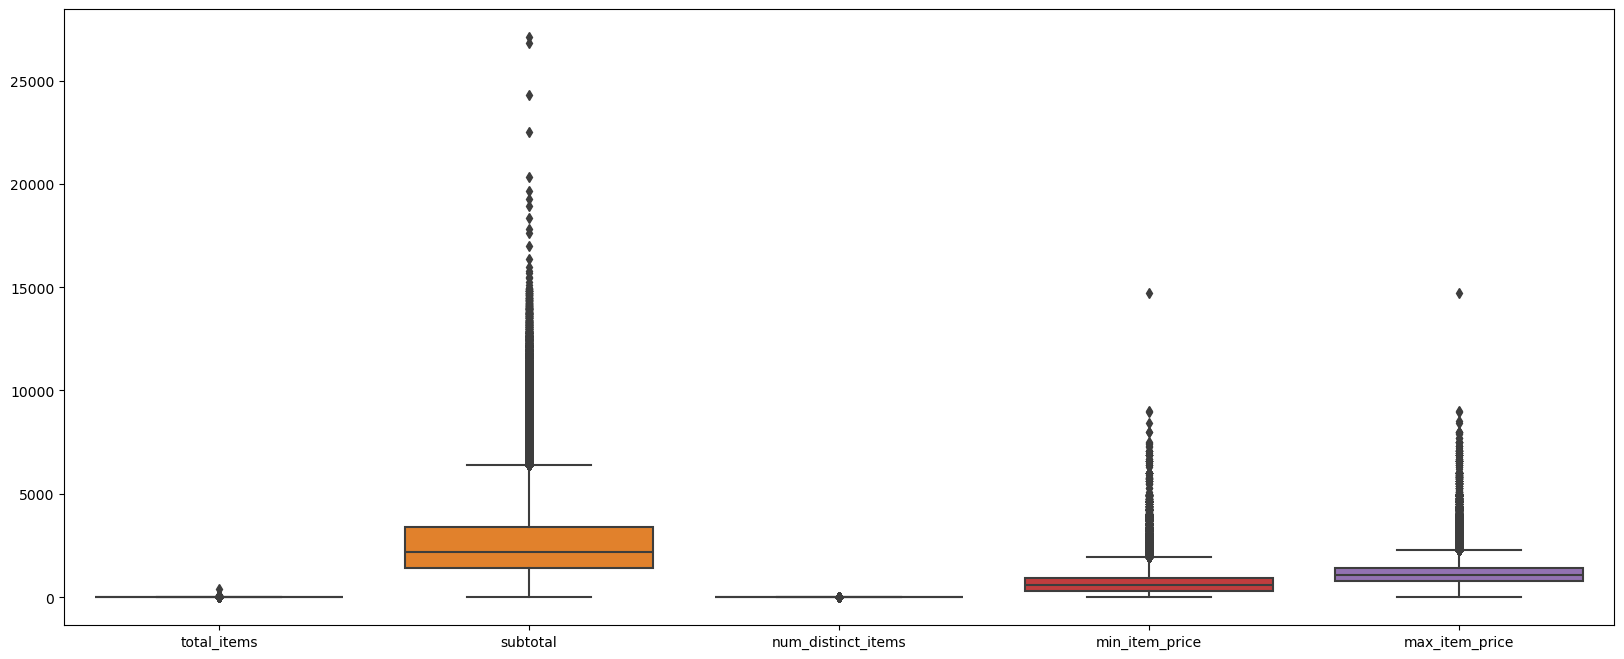

In [47]:
py.figure(figsize=(20, 8))
sns.boxplot(data=df[['total_items', 'subtotal', 'num_distinct_items', 'min_item_price', 
                     'max_item_price']])

<Axes: >

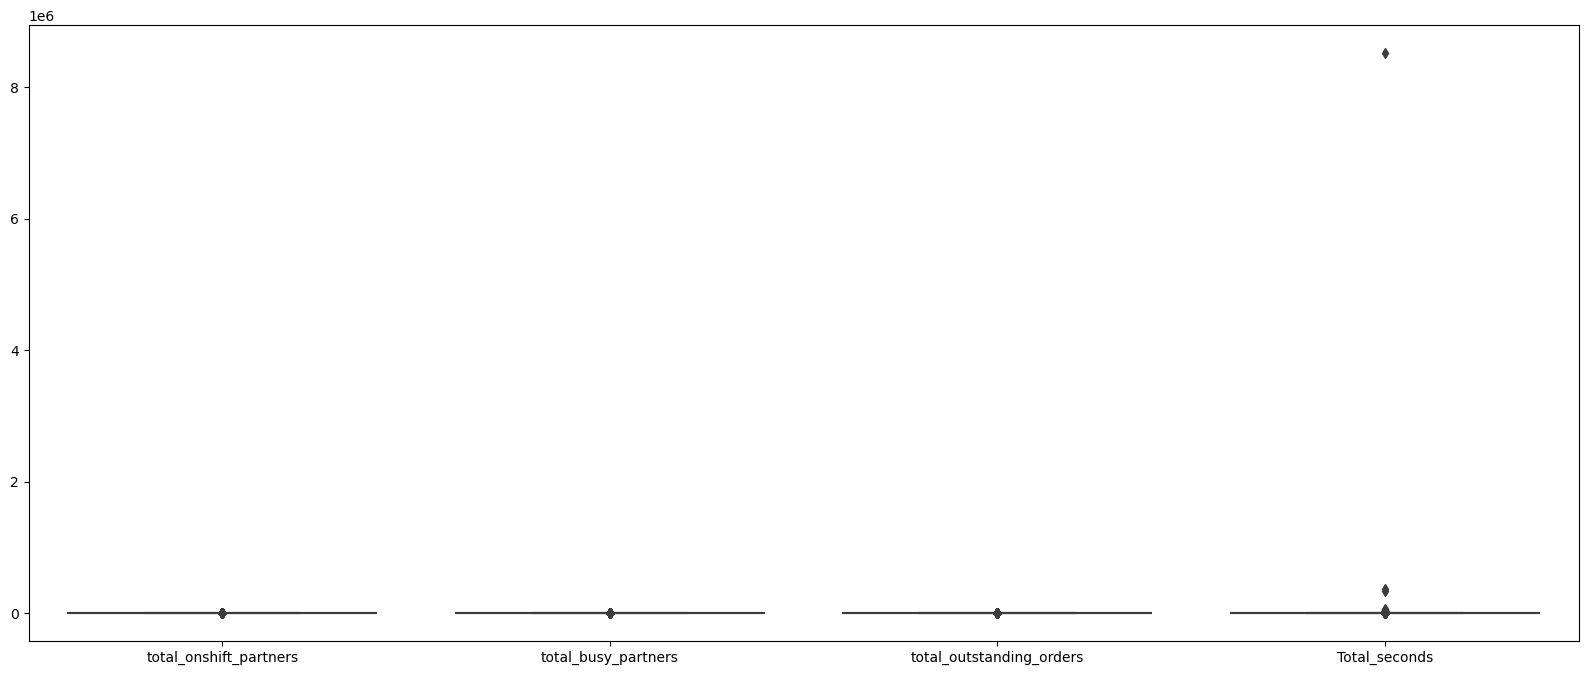

In [48]:
py.figure(figsize=(20, 8))
sns.boxplot(data=df[['total_onshift_partners', 'total_busy_partners',
                     'total_outstanding_orders','Total_seconds']])

#### Insights Drawn From These

1.Subtotal Column has Most Of the outliers.Total Seconds has few outliers.


##### Removing Outliers from all the columns

In [49]:
columns=[ 'subtotal', 'Total_seconds', 'min_item_price', 
                     'max_item_price','total_items']
for i in columns:
    Q1 = df[i].quantile(0.25)
    Q3 = df[i].quantile(0.75)
    IQR=Q3-Q1
    lower_bound = Q1 -( 1.5 * IQR)
    upper_bound = Q3 + (1.5 * IQR)
    df =df[(df[i] >= lower_bound) & (df[i] <= upper_bound)]

<Axes: >

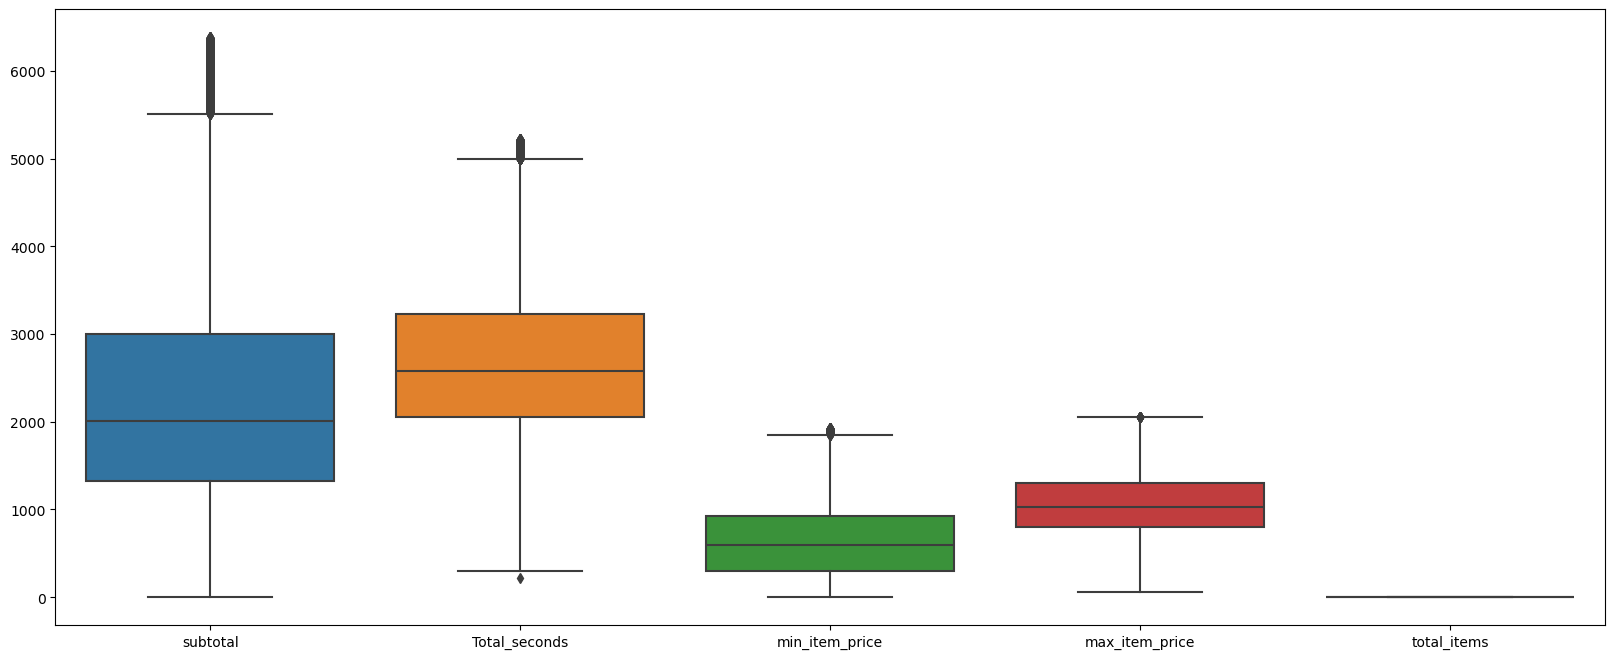

In [50]:
py.figure(figsize=(20, 8))
sns.boxplot(data=df[['subtotal', 'Total_seconds', 'min_item_price', 
                     'max_item_price','total_items']])

##### Drawing Distributions after removing outliers

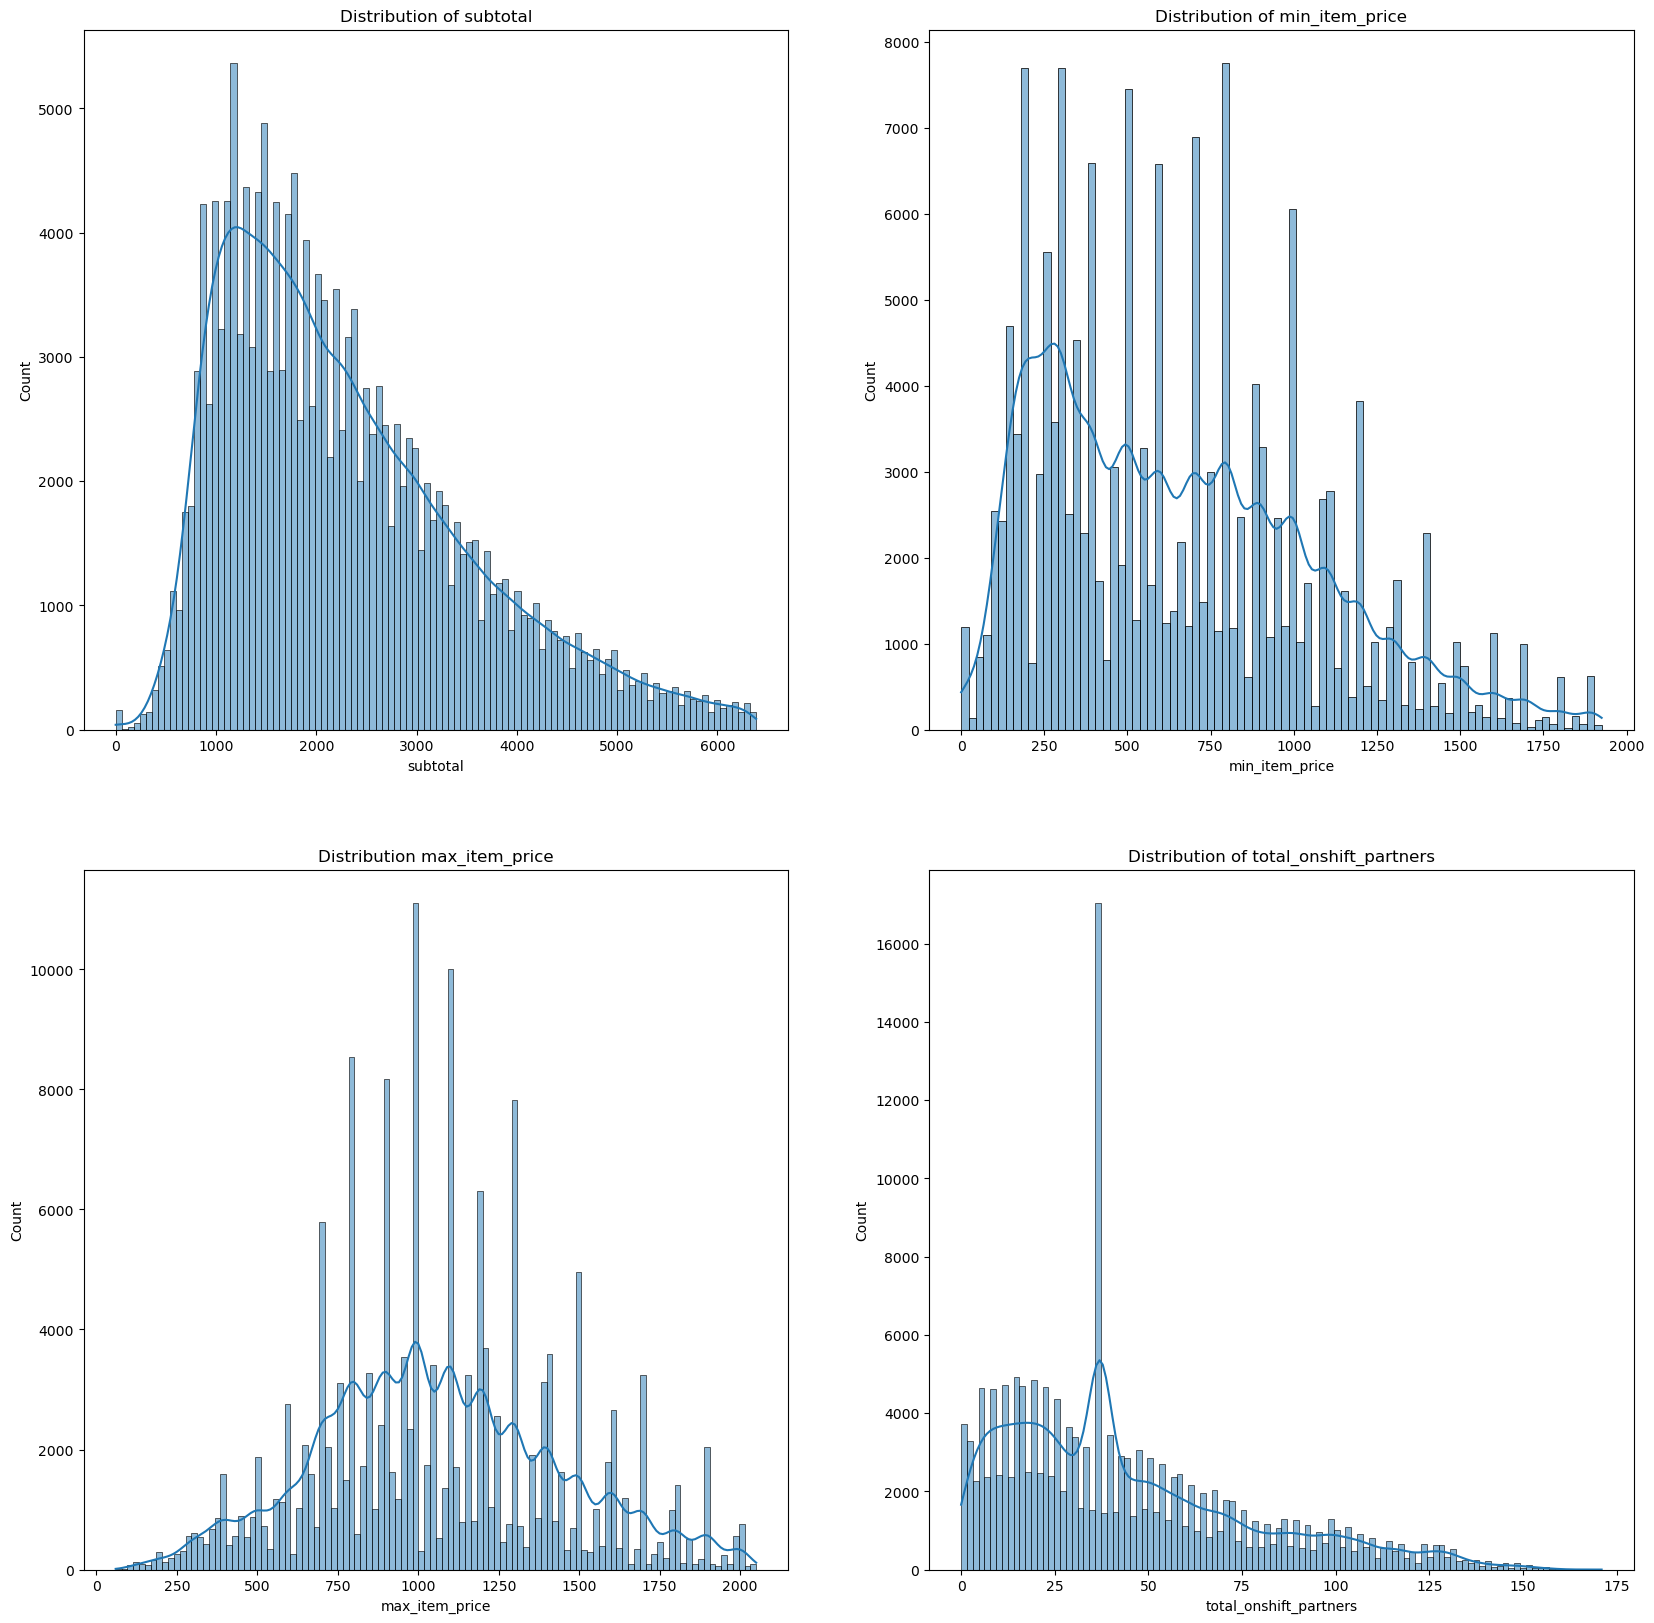

In [51]:
fig,axes=py.subplots(nrows=2,ncols=2,figsize=(20,20))
axes = axes.flatten()
sns.histplot(df['subtotal'],kde=True,ax=axes[0])
sns.histplot(df['min_item_price'], kde=True,ax=axes[1])
sns.histplot(df['max_item_price'], kde=True,ax=axes[2])
sns.histplot(df['total_onshift_partners'], kde=True,ax=axes[3])
axes[0].set_title('Distribution of subtotal')
axes[1].set_title('Distribution of min_item_price')
axes[2].set_title('Distribution max_item_price')
axes[3].set_title('Distribution of total_onshift_partners')
py.show()

In [52]:
round(df['total_onshift_partners'].mean())

44

In [53]:
round(df['total_onshift_partners'].value_counts())

total_onshift_partners
37.0     15478
0.0       2916
15.0      2538
18.0      2507
21.0      2475
         ...  
163.0        1
164.0        1
159.0        1
169.0        1
168.0        1
Name: count, Length: 168, dtype: int64

In [54]:
round(df['min_item_price'].mean())

653

In [55]:
round(df['min_item_price'].mode())

0    795
Name: min_item_price, dtype: int64

In [56]:
round(df['max_item_price'].mean())

1061

In [57]:
round(df['max_item_price'].mode())

0    1095
Name: max_item_price, dtype: int64

In [58]:
round(df['subtotal'].mean())

2294

In [59]:
round(df['subtotal'].mode())

0    1500
Name: subtotal, dtype: int64

#### Insights Drawn From This

1.Average Mininimum price of the order is 653.But Most Of the order's minimum price is 795.

2.Average Maximum price of the order is 1061.But Most Of the order's maximum price is 1095.

3.Average Total Price of most of the order is 2294.But Most Of the order's total price is 1500.

4.Average no. of total onshift parter are 44. But Most Of time total partner That was Present are 37.

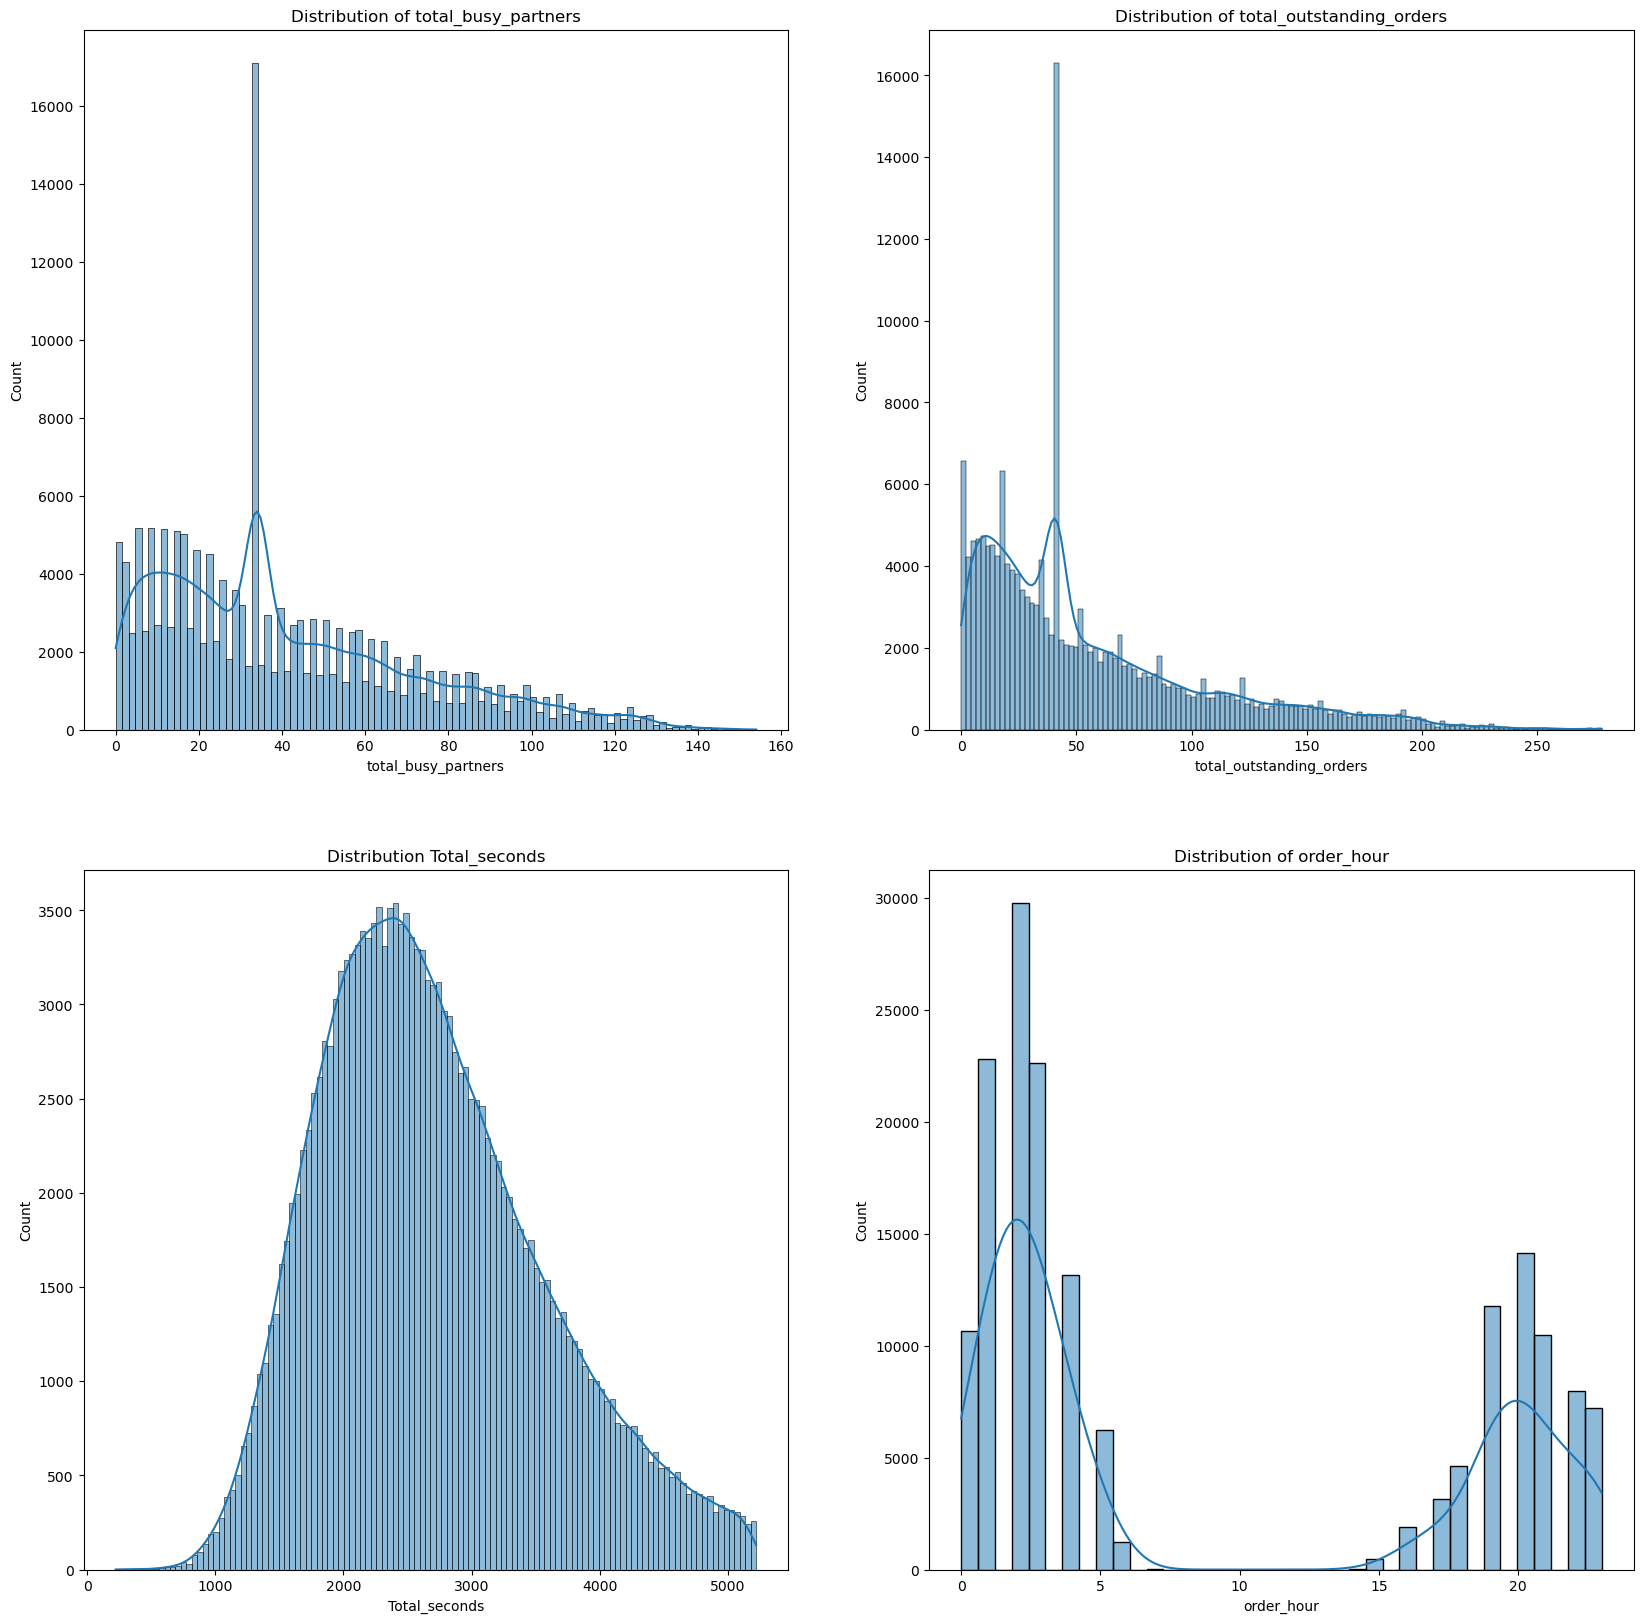

In [60]:
fig,axes=py.subplots(nrows=2,ncols=2,figsize=(20,20))
axes = axes.flatten()
sns.histplot(df['total_busy_partners'],kde=True,ax=axes[0])
sns.histplot(df['total_outstanding_orders'], kde=True,ax=axes[1])
sns.histplot(df['Total_seconds'], kde=True,ax=axes[2])
sns.histplot(df['order_hour'], kde=True,ax=axes[3])
axes[0].set_title('Distribution of total_busy_partners')
axes[1].set_title('Distribution of total_outstanding_orders')
axes[2].set_title('Distribution Total_seconds')
axes[3].set_title('Distribution of order_hour')
py.show()

In [61]:
print('average value of total_busy_partners:',round(df['total_busy_partners'].mean()))
print('average value of total_outstanding_orders:',round(df['total_outstanding_orders'].mean()))
print('average value of Total_seconds:',round(df['Total_seconds'].mean()))
print('average value of order_hour:',round(df['order_hour'].median()))

average value of total_busy_partners: 41
average value of total_outstanding_orders: 55
average value of Total_seconds: 2692
average value of order_hour: 3


In [62]:
print('Most repititive value of total_busy_partners:',round(df['total_busy_partners'].mode()))
print('Most repititive value of total_outstanding_orders:',round(df['total_outstanding_orders'].mode()))
print('Most repititive value of Total_seconds:',round(df['Total_seconds'].mode()))
print('Most repititive value of order_hour:',df['order_hour'].mode())

Most repititive value of total_busy_partners: 0    34.0
Name: total_busy_partners, dtype: float64
Most repititive value of total_outstanding_orders: 0    41.0
Name: total_outstanding_orders, dtype: float64
Most repititive value of Total_seconds: 0    2483.0
Name: Total_seconds, dtype: float64
Most repititive value of order_hour: 0    2
Name: order_hour, dtype: int32


#### Important insights 
1.Average value of total_busy_partners is 40.But Most Of the time total_busy_partners was 34.

2.Average Value of total_outstanding_orders is 55.But Most Of time total order placed was 41.

3.Average value of total second taken 2661.But total second taken for Most Of the order is 2483.

4.mode of the order was placed around 2am and 3am.

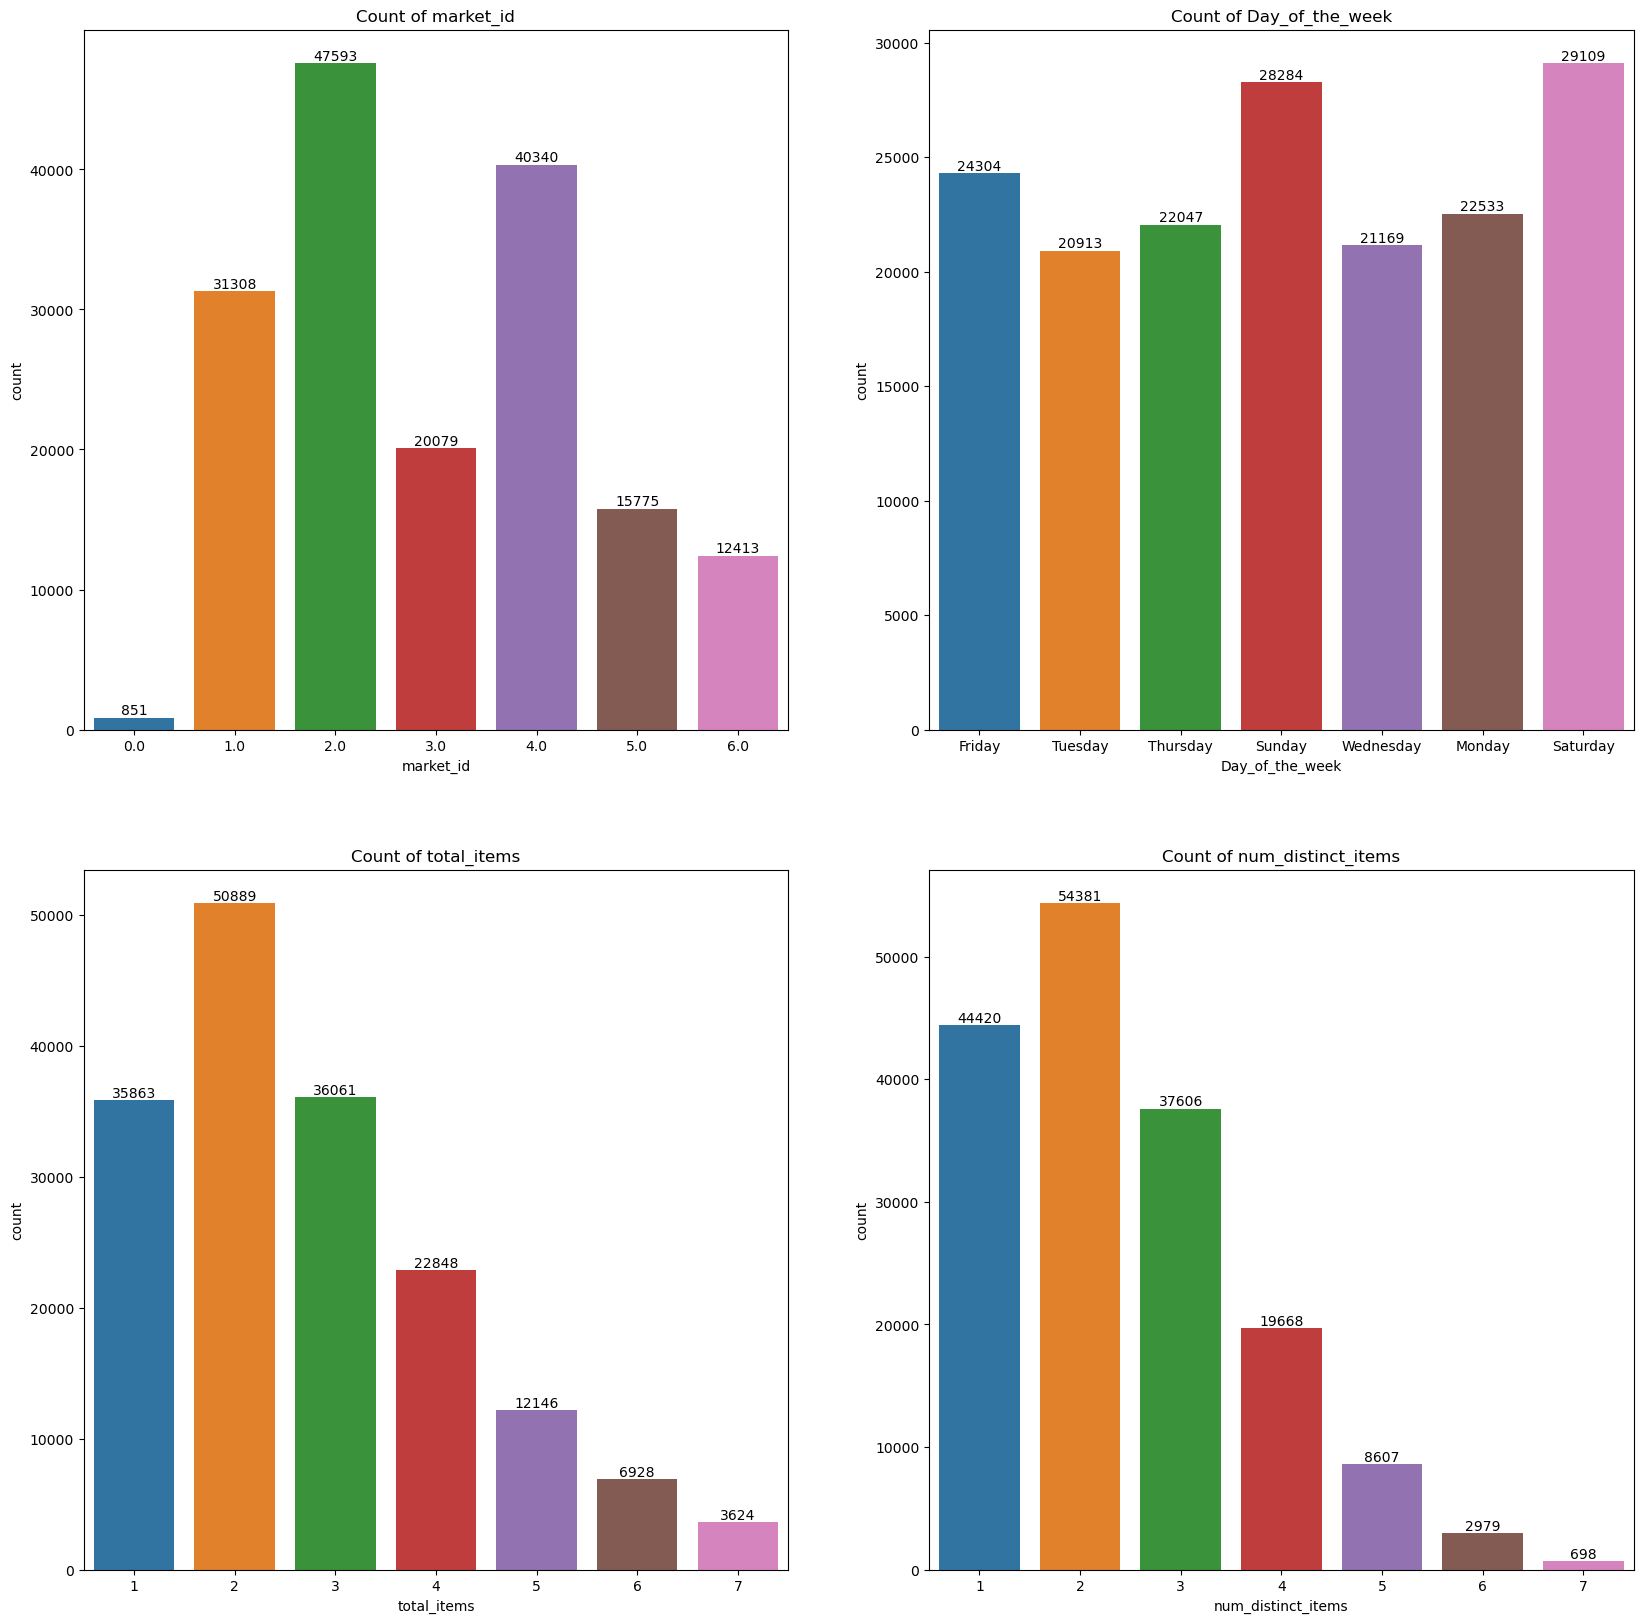

In [63]:
fig,axes=py.subplots(nrows=2,ncols=2,figsize=(20,20))
axes = axes.flatten()
graph=sns.countplot(x='market_id',data=df,ax=axes[0])
axes[0].set_title('Count of market_id')
for container in graph.containers:
    graph.bar_label(container)

graph=sns.countplot(x='Day_of_the_week',data=df,ax=axes[1])
axes[1].set_title('Count of Day_of_the_week')
for container in graph.containers:
    graph.bar_label(container)

graph=sns.countplot(x='total_items',data=df,ax=axes[2])
axes[2].set_title('Count of total_items')
for container in graph.containers:
    graph.bar_label(container)

graph=sns.countplot(x='num_distinct_items',data=df,ax=axes[3])
axes[3].set_title('Count of num_distinct_items')
for container in graph.containers:
    graph.bar_label(container)

Text(0.5, 1.0, 'Count of busy_to_onshift_ratio')

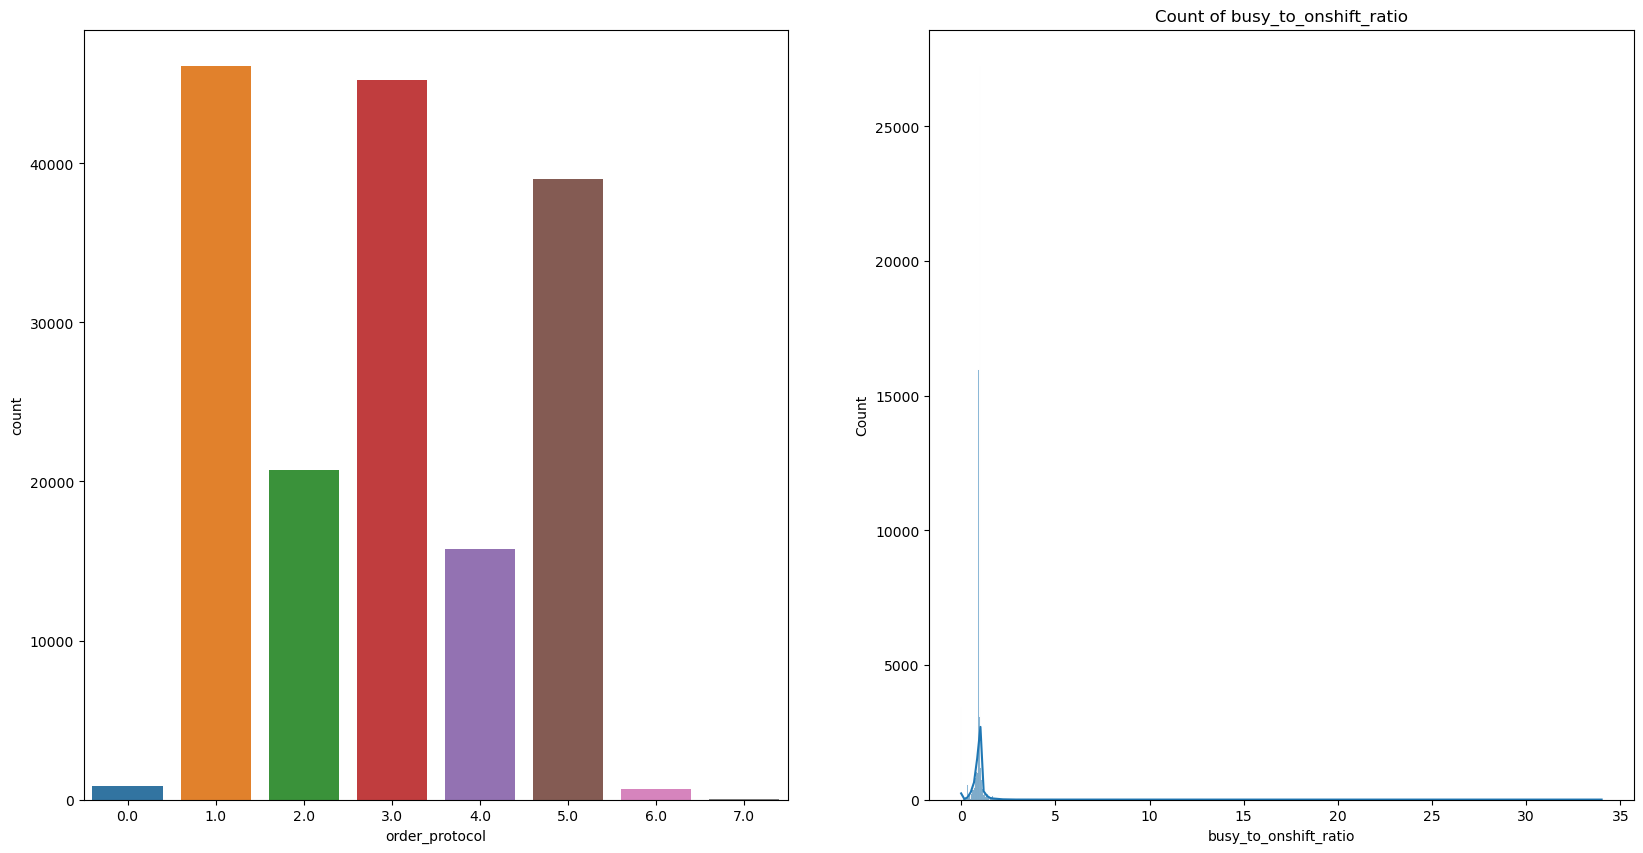

In [64]:
fig,axes=py.subplots(nrows=1,ncols=2,figsize=(20,10))
axes = axes.flatten()

axes[0]=sns.countplot(x='order_protocol',data=df,ax=axes[0])
graph.set_title('Count of order_protocol')
for container in graph.containers:
    graph.bar_label(container)

sns.histplot(df['busy_to_onshift_ratio'],kde=True,ax=axes[1])
axes[1].set_title('Count of busy_to_onshift_ratio')


#### Important insights

1.Most Of the Order are placed from market id 2. and are placed on saturday & Sunday in order protocol 1.

2.In Most of the orders distinct item and total items are 2.

## Multivariate Analysis

In [65]:
df.columns

Index(['market_id', 'created_at', 'store_id', 'store_primary_category',
       'order_protocol', 'total_items', 'subtotal', 'num_distinct_items',
       'min_item_price', 'max_item_price', 'total_onshift_partners',
       'total_busy_partners', 'total_outstanding_orders', 'Total_min',
       'Total_seconds', 'Day_of_the_week', 'order_hour',
       'busy_to_onshift_ratio'],
      dtype='object')

### Finding correlation between variables

In [66]:
vars = ['total_items', 'subtotal', 'num_distinct_items', 'total_onshift_partners','total_busy_partners',
       'total_outstanding_orders','Total_seconds','order_hour','busy_to_onshift_ratio']
df[vars].corr()

,total_items,subtotal,num_distinct_items,total_onshift_partners,total_busy_partners,total_outstanding_orders,Total_seconds,order_hour,busy_to_onshift_ratio
total_items,1.000000,0.657568,0.889006,0.058804,0.053484,0.059383,0.123235,-0.115412,-0.007534
subtotal,0.657568,1.000000,0.653157,0.144921,0.139277,0.143943,0.185605,-0.214335,0.004040
num_distinct_items,0.889006,0.653157,1.000000,0.068122,0.062201,0.068293,0.132015,-0.131008,-0.007517
total_onshift_partners,0.058804,0.144921,0.068122,1.000000,0.943134,0.937223,0.108715,-0.365415,-0.000939
total_busy_partners,0.053484,0.139277,0.062201,0.943134,1.000000,0.933303,0.129065,-0.340746,0.167955
total_outstanding_orders,0.059383,0.143943,0.068293,0.937223,0.933303,1.000000,0.214404,-0.350707,0.054434
Total_seconds,0.123235,0.185605,0.132015,0.108715,0.129065,0.214404,1.000000,-0.174719,0.040952
order_hour,-0.115412,-0.214335,-0.131008,-0.365415,-0.340746,-0.350707,-0.174719,1.000000,0.026720
busy_to_onshift_ratio,-0.007534,0.004040,-0.007517,-0.000939,0.167955,0.054434,0.040952,0.026720,1.000000


### Visualizing relation between variables

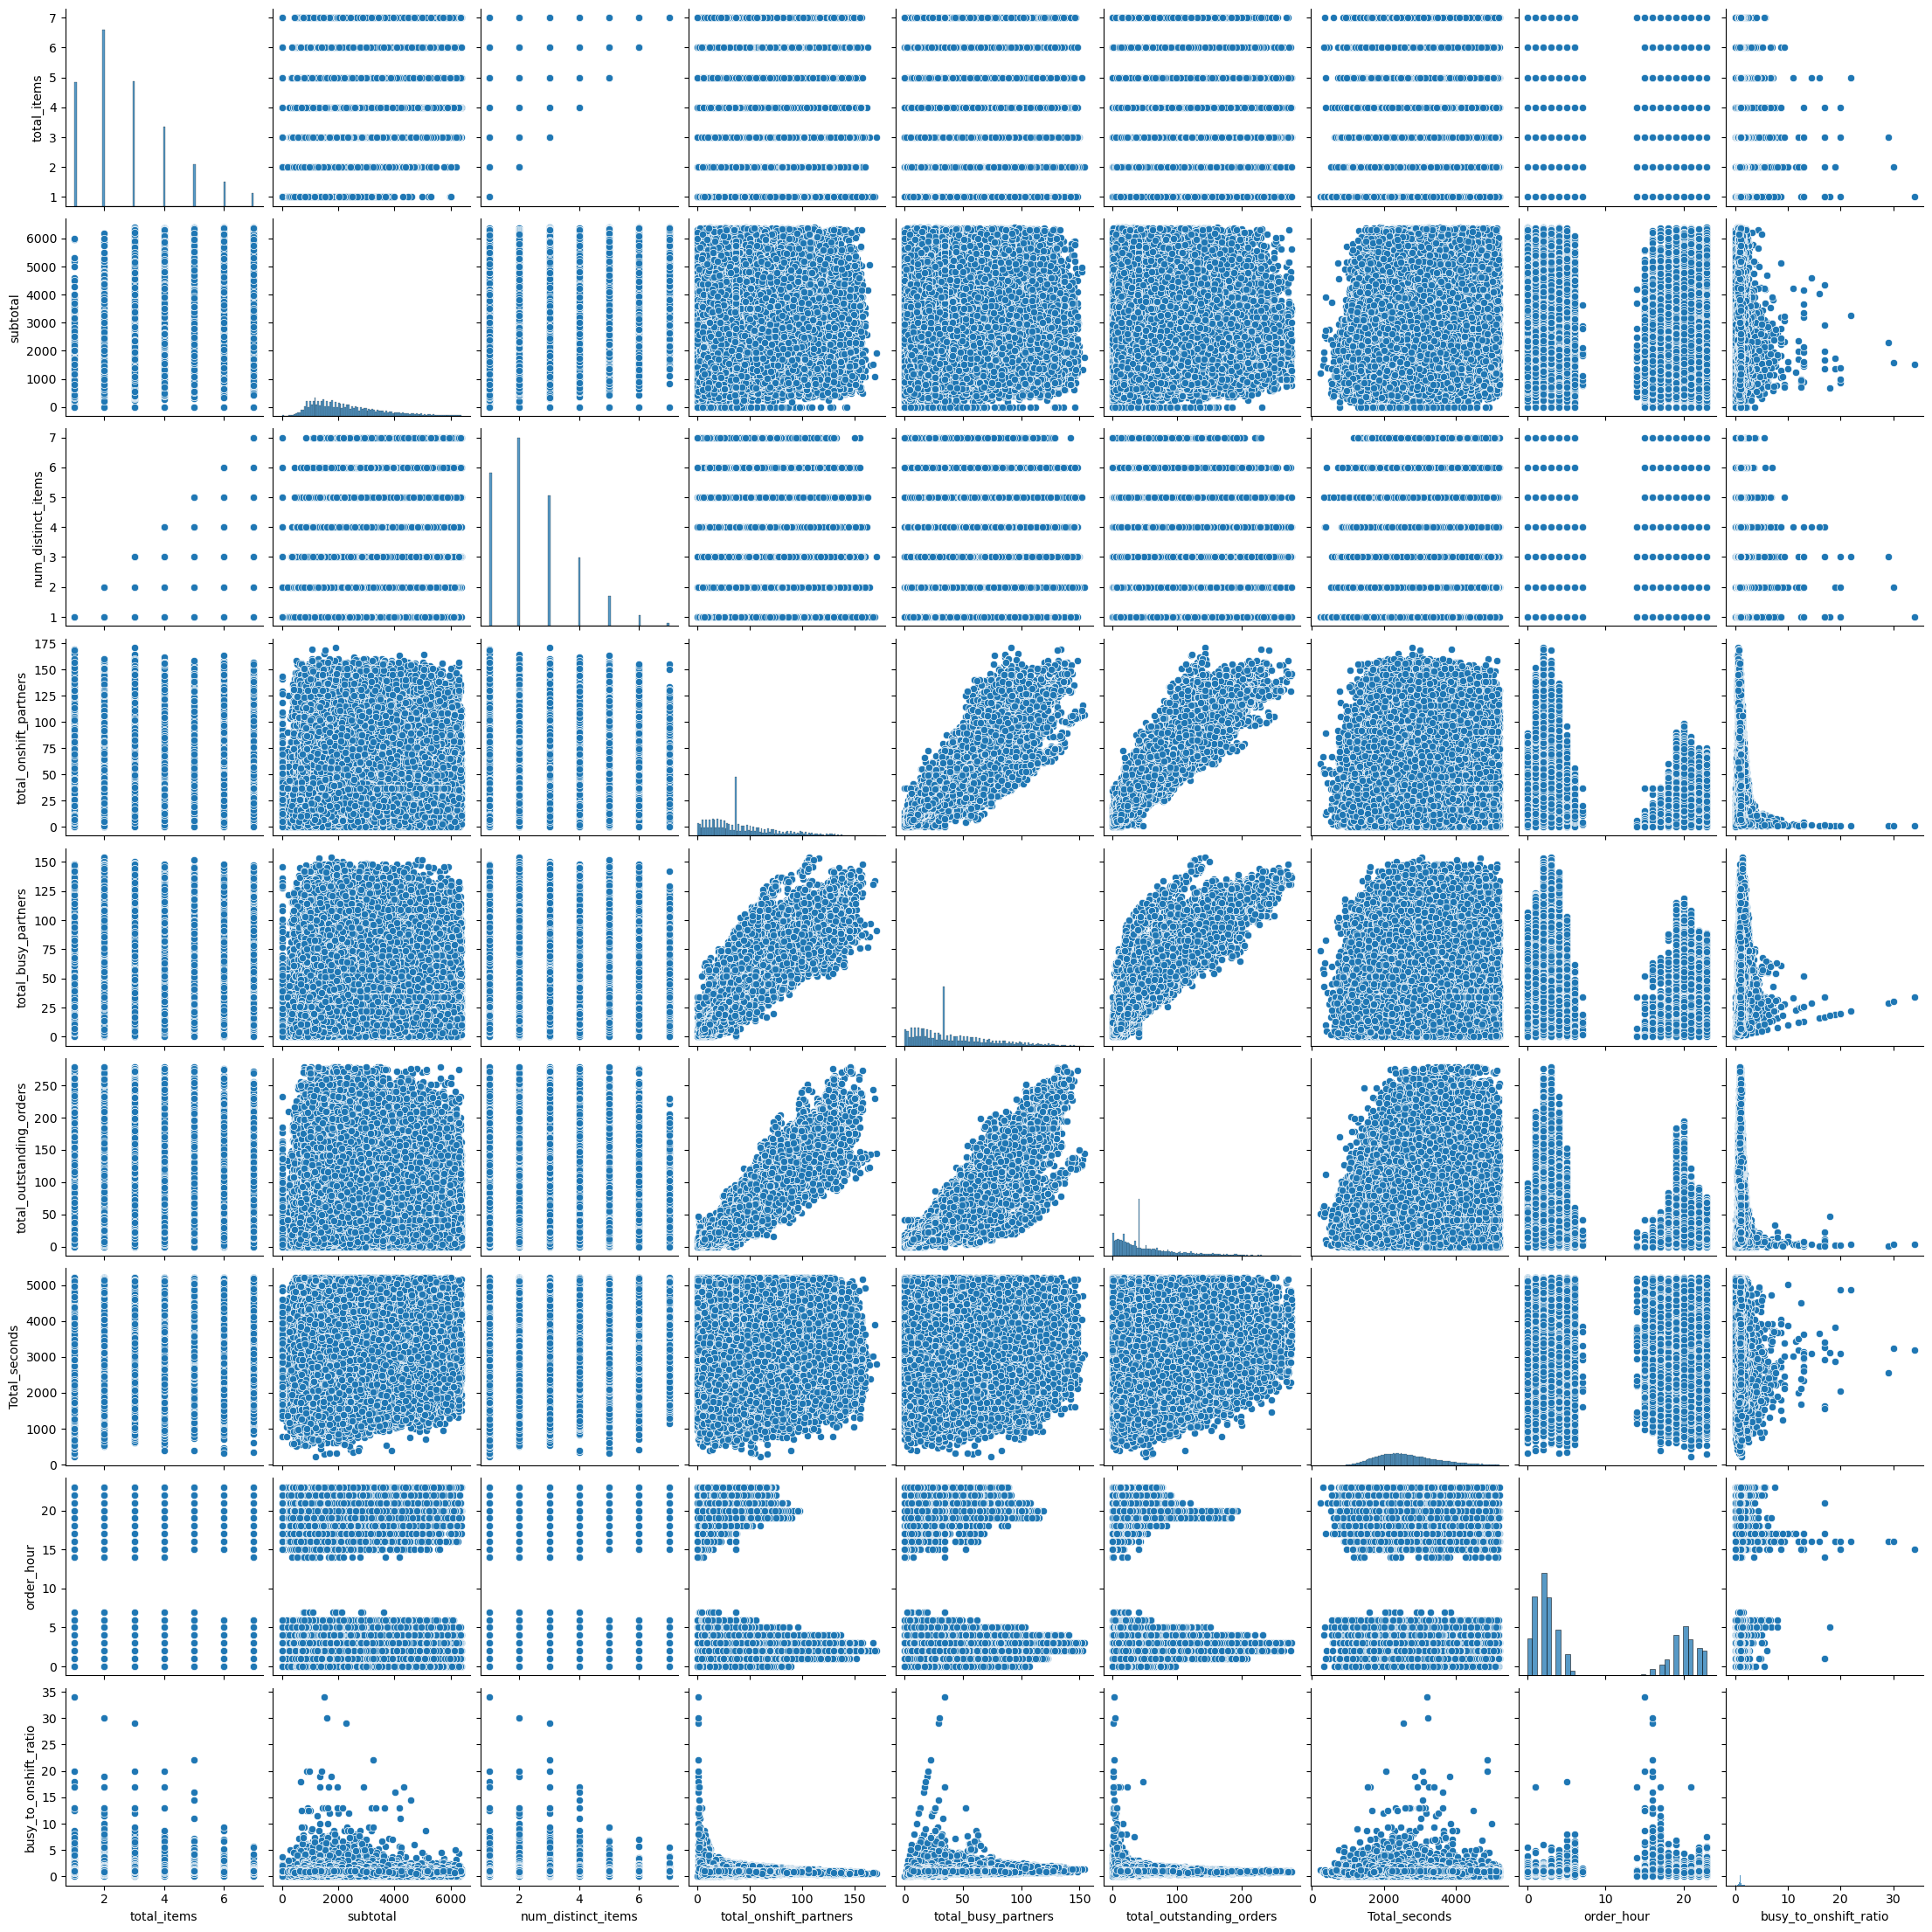

In [67]:
sns.pairplot(df[vars])

### Visualize the Pearson correlation matrix

In [68]:
pearson_corr = df[['total_items', 'subtotal', 'num_distinct_items', 'min_item_price', 'max_item_price',
                     'total_onshift_partners', 'total_busy_partners', 'total_outstanding_orders', 'Total_seconds', 'busy_to_onshift_ratio']].corr()

pearson_corr


,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders,Total_seconds,busy_to_onshift_ratio
total_items,1.000000,0.657568,0.889006,-0.545284,-0.019892,0.058804,0.053484,0.059383,0.123235,-0.007534
subtotal,0.657568,1.000000,0.653157,0.019123,0.547847,0.144921,0.139277,0.143943,0.185605,0.004040
num_distinct_items,0.889006,0.653157,1.000000,-0.522102,0.082001,0.068122,0.062201,0.068293,0.132015,-0.007517
min_item_price,-0.545284,0.019123,-0.522102,1.000000,0.464120,0.041058,0.043106,0.039713,0.001495,0.011297
max_item_price,-0.019892,0.547847,0.082001,0.464120,1.000000,0.143801,0.141445,0.140660,0.125815,0.012906
total_onshift_partners,0.058804,0.144921,0.068122,0.041058,0.143801,1.000000,0.943134,0.937223,0.108715,-0.000939
total_busy_partners,0.053484,0.139277,0.062201,0.043106,0.141445,0.943134,1.000000,0.933303,0.129065,0.167955
total_outstanding_orders,0.059383,0.143943,0.068293,0.039713,0.140660,0.937223,0.933303,1.000000,0.214404,0.054434
Total_seconds,0.123235,0.185605,0.132015,0.001495,0.125815,0.108715,0.129065,0.214404,1.000000,0.040952
busy_to_onshift_ratio,-0.007534,0.004040,-0.007517,0.011297,0.012906,-0.000939,0.167955,0.054434,0.040952,1.000000


In [69]:
# Visualize the Spearman correlation matrix
spearman_corr = df[['total_items', 'subtotal', 'num_distinct_items', 'min_item_price', 'max_item_price',
                      'total_onshift_partners', 'total_busy_partners', 'total_outstanding_orders',
                     'Total_seconds', 'busy_to_onshift_ratio']].corr(method='spearman')
spearman_corr

,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders,Total_seconds,busy_to_onshift_ratio
total_items,1.000000,0.678856,0.907533,-0.584163,0.005325,0.056120,0.053080,0.057052,0.131687,-0.005193
subtotal,0.678856,1.000000,0.651377,0.025886,0.571607,0.152416,0.148823,0.156316,0.193431,0.012077
num_distinct_items,0.907533,0.651377,1.000000,-0.563244,0.093401,0.063162,0.059517,0.064234,0.135080,-0.007139
min_item_price,-0.584163,0.025886,-0.563244,1.000000,0.416145,0.048362,0.048861,0.050277,-0.001581,0.015424
max_item_price,0.005325,0.571607,0.093401,0.416145,1.000000,0.147217,0.144818,0.151712,0.127854,0.017123
total_onshift_partners,0.056120,0.152416,0.063162,0.048362,0.147217,1.000000,0.964387,0.956736,0.088749,-0.002678
total_busy_partners,0.053080,0.148823,0.059517,0.048861,0.144818,0.964387,1.000000,0.961606,0.111203,0.202011
total_outstanding_orders,0.057052,0.156316,0.064234,0.050277,0.151712,0.956736,0.961606,1.000000,0.175248,0.150168
Total_seconds,0.131687,0.193431,0.135080,-0.001581,0.127854,0.088749,0.111203,0.175248,1.000000,0.138634
busy_to_onshift_ratio,-0.005193,0.012077,-0.007139,0.015424,0.017123,-0.002678,0.202011,0.150168,0.138634,1.000000


#### There is Very Strong Relationship Between Total Orders and total partner availabe that day

## Statistical Tests

In [70]:
df.columns

Index(['market_id', 'created_at', 'store_id', 'store_primary_category',
       'order_protocol', 'total_items', 'subtotal', 'num_distinct_items',
       'min_item_price', 'max_item_price', 'total_onshift_partners',
       'total_busy_partners', 'total_outstanding_orders', 'Total_min',
       'Total_seconds', 'Day_of_the_week', 'order_hour',
       'busy_to_onshift_ratio'],
      dtype='object')

### Anova test for total time taken and store category

In [71]:
import scipy.stats as stats

# One-hot encode 'store_primary_category'
if not any(df.columns.str.startswith('store_category_encoded_')):
    df = pd.get_dummies(df, columns=['store_primary_category'], prefix='store_category_encoded')
    
# Prepare delivery times and store categories
delivery_times = df['Total_seconds']
store_categories = df.filter(like='store_category_encoded_')

# Prepare data for ANOVA
anova_data = {}
for column in store_categories.columns:
    category = column.replace('store_category_encoded_', '')
    anova_data[category] = delivery_times[df[column] == 1]

# Perform ANOVA test
try:
    anova_result = stats.f_oneway(*anova_data.values())
    print("ANOVA Result:", anova_result)
except Exception as e:
    print("Error during ANOVA:", e)

# Check if ANOVA was successful and interpret results
if anova_result.pvalue < 0.05:
    print("Significant differences found between store categories.")
else:
    print("No significant differences found between store categories.")

ANOVA Result: F_onewayResult(statistic=35.3973188030596, pvalue=0.0)
Significant differences found between store categories.


### Conclusion:

The one-way ANOVA test was conducted to determine if there are statistically significant differences in delivery times 
(Total_seconds) across different store categories (store_primary_category).

F-statistic: 35.40
p-value: 0.0

Since the p-value is significantly less than the commonly used significance level of 0.05, we reject the null hypothesis.
This indicates that there are significant differences in delivery times across the different store categories.

Implication: The store category significantly impacts the delivery time. 
This suggests that different types of stores have varying efficiencies or challenges in processing and completing deliveries,
which could be due to factors such as item complexity,
order volume, or logistical differences.

### Chi-Square test for each store category with order protocol

In [72]:
# One-hot encode 'store_primary_category' if not already done
if not any(df.columns.str.startswith('store_category_encoded_')):
    df = pd.get_dummies(df, columns=['store_primary_category'], prefix='store_category_encoded')

# Perform Chi-Square test for each store category
for category in df.filter(like='store_category_encoded_').columns:
    print(f"Chi-Square test for {category}\n")
    
    # Create the contingency table for 'order_protocol' and the current store category
    contingency_table = pd.crosstab(df['order_protocol'], df[category])

    # Perform the Chi-Square test
    chi2, p, dof, ex = stats.chi2_contingency(contingency_table)

    # Print the results
    print(f"Chi-Square Statistic: {chi2:.2f}")
    print(f"P-value: {p:.4f}")
    print(f"Degrees of Freedom: {dof}")
    print("Expected Frequencies:")
    print(pd.DataFrame(ex, index=contingency_table.index, columns=contingency_table.columns))
    print("\n")

    # Interpret the results
    if p < 0.05:
        print(f"Significant association found between order protocol and {category}.")
    else:
        print(f"No significant association found between order protocol and {category}.")
    print("\n" + "-"*50 + "\n")


Chi-Square test for store_category_encoded_Unknown

Chi-Square Statistic: 9766.03
P-value: 0.0000
Degrees of Freedom: 7
Expected Frequencies:
store_category_encoded_Unknown         False        True 
order_protocol                                           
0.0                               844.016417    19.983583
1.0                             45037.653823  1066.346177
2.0                             20238.810340   479.189660
3.0                             44195.591147  1046.408853
4.0                             15373.016619   363.983381
5.0                             38106.755119   902.244881
6.0                               653.526601    15.473399
7.0                                15.629934     0.370066


Significant association found between order protocol and store_category_encoded_Unknown.

--------------------------------------------------

Chi-Square test for store_category_encoded_afghan

Chi-Square Statistic: 92.57
P-value: 0.0000
Degrees of Freedom: 7
Expected Frequenc

### Conclusion

From the results, you can conclude that there is a significant association between order_protocol and most of
the store categories tested, except for store_category_encoded_alcohol-plus-food. This suggests that the type of 
store (as defined by its primary category) has a significant impact on the order protocol being used.

### Anova test for total time taken and order protocol

In [73]:
import scipy.stats as stats

# One-hot encode 'order_protocol'
if not any(df.columns.str.startswith('order_protocol_encoded_')):
    df = pd.get_dummies(df, columns=['order_protocol'], prefix='order_protocol_encoded')
    
# Prepare delivery times and order protocol
delivery_times = df['Total_seconds']
store_categories = df.filter(like='order_protocol_encoded_')

# Prepare data for ANOVA
anova_data = {}
for column in store_categories.columns:
    category = column.replace('order_protocol_encoded_', '')
    anova_data[category] = delivery_times[df[column] == 1]

# Perform ANOVA test
try:
    anova_result = stats.f_oneway(*anova_data.values())
    print("ANOVA Result:", anova_result)
except Exception as e:
    print("Error during ANOVA:", e)

# Check if ANOVA was successful and interpret results
if anova_result.pvalue < 0.05:
    print("Significant differences found between store categories.")
else:
    print("No significant differences found between store categories.")

ANOVA Result: F_onewayResult(statistic=223.65605148723512, pvalue=0.0)
Significant differences found between store categories.


### Conclusion:
The one-way ANOVA test was conducted to determine if there are statistically significant differences in delivery 
times (Total_seconds) across different order protocol (order_protocol).

F-statistic: 223.65605148723512 p-value: 0.0

Since the p-value is significantly less than the commonly used significance level of 0.05, we reject the null hypothesis. 
This indicates that there are significant differences in delivery times across the different order protocol.

Implication: The order protocol significantly impacts the delivery time. This suggests that different types of orders have
varying efficiencies or challenges in processing and completing deliveries, which could be due to factors such as item complexity, 
order volume, or logistical differences.

In [74]:
# Filter data for two store categories
american_times = df[df['store_category_encoded_american']]['Total_seconds']
afghan_times = df[df['store_category_encoded_afghan']]['Total_seconds']

# Conduct the t-test
t_stat, p_value = stats.ttest_ind(american_times, afghan_times, equal_var=False)

# Output the results
print(f"T-Statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")

# Interpretation
if p_value < 0.05:
    print("There is a significant difference in delivery times between 'american' and 'afghan' stores.")
else:
    print("There is no significant difference in delivery times between 'american' and 'afghan' stores.")


T-Statistic: -1.1819
P-value: 0.2400
There is no significant difference in delivery times between 'american' and 'afghan' stores.


## Conclusion
The p-value of 0.2400 is greater than the significance level of 0.05, 
indicating that there is no statistically significant difference in the average delivery times between american and afghan stores.